      accuracy     precision     recall rates
C       0.35        0.167           0.2
D                   0.375           0.375
M                   0.5             0.429


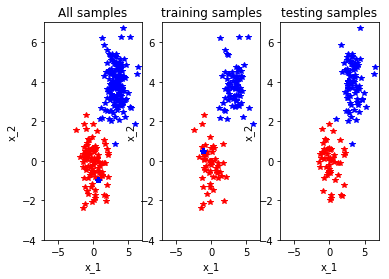

score Scikit learn:  1.0


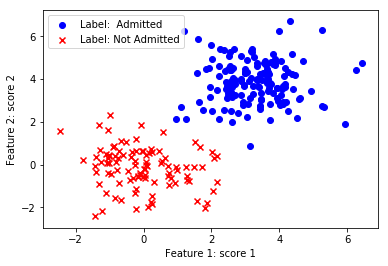

theta  [0.0009844473004275924, 0.001186760891971908]
cost is  0.6907744681700863
theta  [0.1379927835166225, 0.1673646628268532]
cost is  0.44911141656638615
theta  [0.2117506553883102, 0.2583967078568726]
cost is  0.37919160945858366
theta  [0.25980158813342474, 0.31891541876216484]
cost is  0.3490567845818528
theta  [0.29464273770034416, 0.36375476345001534]
cost is  0.3328472417927776


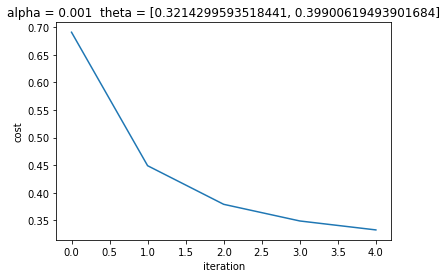

self-developed model score:  0.8
Scikits score:  1.0
average error: 0.26153846153846155 (0.43947251867956005)


In [196]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import pandas as pd

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

# import self-defined functions
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        est_yi = Prediction(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(est_yi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-est_yi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    #print 'cost is ', J 
    return J

def Sigmoid(x):
    g = float(1.0 / float((1.0 + math.exp(-1.0*x))))
    return g

def Prediction(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)

def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Prediction(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J

# execute gradient updates over thetas
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        deltaF = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - deltaF
        new_theta.append(new_theta_value)
    return new_theta

def getDataSet():
    """
    Returns X (250 X 2) and Y (250 X 1)
    """
    # Step 1: Generate data by a module
    n = 100  # 1st class contains N objects
    alpha = 1.5  # 2st class contains alpha*N ones
    sig2 = 1  # assume 2nd class has the same variance as the 1st
    dist2 = 4

    # later we move this piece of code in a separate file
    # [X, y] = loadModelData(N, alpha, sig2, dist2);
    n2 = math.floor(alpha * n)  # calculate the size of the 2nd class
    cls1X = np.random.randn(n, 2)  # generate random objects of the 1st class

    # generate a random distance from the center of the 1st class to the center of the 2nd
    # https://stackoverflow.com/questions/1721802/what-is-the-equivalent-of-matlabs-repmat-in-numpy
    a = np.array([[math.sin(math.pi * random.random()), math.cos(math.pi * random.random())]])
    a1 = a * dist2
    shiftClass2 = np.kron(np.ones((n2, 1)), a1)

    # generate random objects of the 2nd class
    cls2X = sig2 * np.random.randn(n2, 2) + shiftClass2
    # combine the objects
    X = np.concatenate((cls1X, cls2X), axis=0)
    
    # assign class labels: 0s and 1s
    y = np.concatenate((np.zeros((cls1X.shape[0], 1)), np.ones((cls2X.shape[0], 1))), axis=0)#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html
    # end % of module.
    #print (X)#[[ 1.98053936e+00 -1.35498933e+00] \n [-9.05807719e-01  1.20687340e+00]
    #print (y)#[[0.] \n [0.]
    return X, y

def func_DisplayData(dataSamplesX, dataSamplesY, chartNum, titleMessage):
    idx1 = (dataSamplesY == 0).nonzero()  # object indices for the 1st class
    idx2 = (dataSamplesY == 1).nonzero()
    ax = fig.add_subplot(1, 3, chartNum)
    
    # no more variables are needed
    t=np.arange(0.0,70,.01)
    plt.plot(dataSamplesX[idx1, 0], dataSamplesX[idx1, 1], 'r*')
    plt.plot(dataSamplesX[idx2, 0], dataSamplesX[idx2, 1], 'b*')
    #plt.plot(dataSamplesX[idx1, 0], dataSamplesX[idx1, 1], 'r*')
    #plt.plot(dataSamplesX[idx2, 0], dataSamplesX[idx2, 1], 'b*')
    # axis tight
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    plt.xlim(-7,7)
    plt.ylim(-4,7)
    ax.set_title(titleMessage) 
    
def how_many_space(number):
    space=''
    for i in range(number):
        space = space + ' '
    return space
    
def func_calConfusionMatrix(predY,trueY):
    total = len(trueY)
    how_many_class=[]
    item = trueY[0]
    how_many_class.append(item)
    for i in range(1,total):
        if np.array_equal(item, trueY[i]):#if item == trueY[i]:
            continue
        if trueY[i] in how_many_class:
            continue
        item = trueY[i]
        how_many_class.append(item)
    counter = [0]*len(how_many_class) #total for precision, sum of column
    tp = [0]*len(how_many_class) # true prediction
    row_counter=[0]*len(how_many_class)#total, used recall. sum of row
    for i in range(len(how_many_class)):
        for j in range(total):
            if how_many_class[i] == predY[j]:
                counter[i] = counter[i] +1
            if how_many_class[i] == trueY[j]:
                row_counter[i] = row_counter[i]+1
            if how_many_class[i] == trueY[j]:
                if trueY[j] == predY[j]:
                    tp[i] = tp[i]+1
    accuracy = round(np.sum(tp)/total,3)
    precision=[]
    recall_rate=[]
    longest_word=[]
    for i in range(len(how_many_class)):
        precision.append(round(tp[i]/counter[i],3))
        recall_rate.append(round(tp[i]/row_counter[i],3))
    for i in range (len(how_many_class)):
        longest_word.append(len(str(how_many_class[i])))
    longest_word = max(longest_word)
    for i in range(len(how_many_class)):
        word=''
        if i == 0:
            print (how_many_space(longest_word) + how_many_space(5)+'accuracy'+how_many_space(5)+'precision'+how_many_space(5)+'recall rates')
            word = '{}'.format(how_many_class[i])+how_many_space(len(how_many_class[i])-longest_word+2)+how_many_space(5)+'{}'.format(accuracy)
            word = word + how_many_space(8) + '{}'.format(precision[i])
            if len(str(precision[i]))<4:
                word = word + how_many_space(4-len(str(precision[i])))
            print (word,how_many_space(9),recall_rate[i])
        else:
            word = '{}'.format(how_many_class[i])+how_many_space(longest_word-len(str(how_many_class[i])))
            word = word + how_many_space(19)+'{}'.format(precision[i])
            if len(str(precision[i]))<5:
                word = word + how_many_space(5-len(str(precision[i])))
            word = word + how_many_space(11)+ '{}'.format(recall_rate[i])
            print (word)
    return accuracy, precision, recall_rate

true_class = ['C']*5 + ['D']*8 + ['M']*7
predicted_class = ['D','C','D','D','M','D','D','C','C','M','M','D','C','C','C','M','M','D','D','M']
acc,prec,recall=func_calConfusionMatrix(predicted_class,true_class)

# Starting codes

# Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# step 1: generate dataset that includes both positive and negative samples,
# where each sample is described with two features.
# 250 samples in total.
[X, y] = getDataSet()  # note that y contains only 1s and 0s,
#print ([X,y])#[array([[-0.33192259,  0.99568304], \n       [-0.32558156, -0.82380231],
# create figure for all charts to be placed on so can be viewed together
fig = plt.figure()
#print(fig) #Figure(432x288)



# plotting all samples
func_DisplayData(X, y, 1, 'All samples')

# number of training samples
#nTrain = 250

######################PLACEHOLDER 1#start#########################
# write you own code to randomly pick up nTrain number of samples for training and use the rest for testing.
# WARNIN: 
XX=X
yy=y

maxIndex = len(X)
#print(maxIndex)#250

newMatrix=np.zeros((250,3))
for i in range(250):
    newMatrix[i][0]=XX[i][0]
    newMatrix[i][1]=XX[i][1]
    newMatrix[i][2]=yy[i][0]

#print(newMatrix)#good copied
#print(X)#good copied
#randomTrainingSamples = np.random.shuffle(newMatrix)
randomTrainingSamples = newMatrix[np.random.choice(newMatrix.shape[0], maxIndex, replace=False)]#https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
#print(randomTrainingSamples)#[ 41  93  43  55   4  45 
#print(newMatrix)
yLabel=np.zeros((250,1))
xtrain=np.zeros((250,2))

for i in range(120):
    xtrain[i][0]=randomTrainingSamples[i][0]
    xtrain[i][1]=randomTrainingSamples[i][1]
    yLabel[i][0]=randomTrainingSamples[i][2]


#print(trainX)
trainX = xtrain    #  training samples

trainY = yLabel # labels of training samples    nTrain X 1

yLabel=np.zeros((130,1))
xtrain=np.zeros((130,2))

start=0
for i in range(120,250):
    xtrain[start][0]=randomTrainingSamples[i][0]
    xtrain[start][1]=randomTrainingSamples[i][1]
    yLabel[start][0]=randomTrainingSamples[i][2]
    start = start+1

testX =  xtrain # testing samples               
testY =  yLabel # labels of testing samples     nTest X 1

####################PLACEHOLDER 1#end#########################

# plot the samples you have pickup for training, check to confirm that both negative
# and positive samples are included.
func_DisplayData(trainX, trainY, 2, 'training samples')
func_DisplayData(testX, testY, 3, 'testing samples')

# show all charts
plt.show()


#  step 2: train logistic regression models


######################PLACEHOLDER2 #start#########################
# in this placefolder you will need to train a logistic model using the training data: trainX, and trainY.
# please delete these coding lines and use the sample codes provided in the folder "codeLogit"
# use sklearn class
#**********training and testing using sklearn*************

clf = LogisticRegression()
trainY = np.squeeze(np.asarray(trainY))
clf.fit(trainX,trainY)
print ('score Scikit learn: ', clf.score(testX,testY))
Y = np.array(yy)
Y = np.squeeze(np.asarray(Y))
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Feature 1: score 1')
ylabel('Feature 2: score 2')
legend(['Label:  Admitted', 'Label: Not Admitted'])
show()

#*************************ending to sklearn*****************
#********training and testing using self-developed model*****
theta = [0,0] #initial model parameters
alpha = 0.001 # learning rates
max_iteration = 1000 # maximal iterations
Y = np.array(yy)
Y = np.squeeze(np.asarray(Y))

m = len(Y) # number of samples
arrCost=[]
for x in range(max_iteration):# call the functions for gradient descent method
    new_theta = Gradient_Descent(X,Y,theta,m,alpha)
    theta = new_theta
    if x % 200 == 0:# calculate the cost function with the present theta
        arrCost.append(Cost_Function(X,Y,theta,m))
        print ('theta ', theta)
        print ('cost is ', Cost_Function(X,Y,theta,m))
plt.plot(range(0,len(arrCost)),arrCost);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(alpha, theta))
plt.show()
#********************ending to self-developed model****************
##logReg = LogisticRegression(fit_intercept=True, C=1e15) # create a model
##logReg.fit(trainX, trainY)# training
##coeffs = logReg.coef_ # coefficients This is the errror part
##intercept = logReg.intercept_ # bias 
##bHat = np.hstack((np.array([intercept]), coeffs))# model parameters
coeffs = clf.coef_
intercept = clf.intercept_
bHat = np.hstack((np.array([intercept]), coeffs))
######################PLACEHOLDER2 #end #########################

 

# step 3: Use the model to get class labels of testing samples.

######################PLACEHOLDER3 #start#########################
# codes for making prediction, 
# with the learned model, apply the logistic model over testing samples
# hatProb is the probability of belonging to the class 1.
#y = 1/(1+np.exp(-Xb))
#yHat = 1./(1+exp( -[ones(( X.shape[0],1 )), X] * bHat ));
#*************************comparing two models*********************
score = 0
winner = ""
# accuracy for sklearn
scikit_score = clf.score(testX,testY)
length = len(testX)
for i in range(length):
    prediction = round(Prediction(testX[i],theta))
    answer = testY[i]
    if prediction == answer:
        score += 1

my_score = float(score) / float(length)
#if my_score > scikit_score:
#    print ('self-developed model won..')
#elif my_score == scikit_score:
#    print ('Its a tie!')
#else:
#    print ('Scikit won..')
print ('self-developed model score: ', my_score)
print ('Scikits score: ', scikit_score )
#**********************ending of two models************************
# WARNING: please DELETE THE FOLLOWING CODEING LINES and write your own codes for making predictions

##xHat = np.concatenate((np.ones((testX.shape[0], 1)), testX), axis=1)  # add column of 1s to left most  ->  130 X 3
#print(xHat)
#egXHat = np.negative(xHat)  # -1 multiplied by matrix -> still 130 X 3
##hatProb = 1.0 / (1.0 + np.exp(negXHat * bHat))  # variant of classification   -> 130 X 3
# predict the class labels with a threshold
##yHat = (hatProb >= 0.5).astype(int)  # convert bool (True/False) to int (1/0)
#print(yHat)
#PLACEHOLDER#end
xHat = np.concatenate((np.zeros((testX.shape[0], 1)), testX), axis=1)
hatProb = 1.0 / (1.0 + np.exp(np.negative(xHat) * bHat))
#print(hatProb)
yHat = (hatProb >= 0.5).astype(int)
#print(yHat)
######################PLACEHOLDER 3 #end #########################


# step 4: evaluation
# compare predictions yHat and and true labels testy to calculate average error and standard deviation
testYDiff = np.abs(yHat - testY)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('average error: {} ({})'.format(avgErr, stdErr))